In [2]:
import pickle

with open("../model_arthur/data/data_useable_2.pickle", "rb") as f:
    train_images, train_labels = pickle.load(f)

    

In [3]:
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

images_array = np.array(train_images)
labels_array = to_categorical(np.array(train_labels))


X_train, X_val, y_train, y_val = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

2024-06-09 22:01:37.296899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Disable SSL certificate warnings
#urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3), classes=2)

# Freeze the base model
base_model.trainable = False

# Set every second BatchNormalization layer to not trainable
batch_norm_counter = 0
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        batch_norm_counter += 1
        if batch_norm_counter % 2 == 0:
            layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1937s 38s/step - accuracy: 0.5832 - loss: 29.4889 - val_accuracy: 0.6800 - val_loss: 0.6168
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2028s 41s/step - accuracy: 0.7715 - loss: 1.6191 - val_accuracy: 0.7275 - val_loss: 0.6190
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2078s 41s/step - accuracy: 0.7991 - loss: 0.5303 - val_accuracy: 0.7100 - val_loss: 0.5635
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2067s 41s/step - accuracy: 0.7786 - loss: 0.5396 - val_accuracy: 0.7200 - val_loss: 0.5005
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2046s 41s/step - accuracy: 0.7778 - loss: 0.4802 - val_accuracy: 0.7150 - val_loss: 0.5256
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2045s 41s/step - accuracy: 0.7838 - loss: 0.4450 - val_accuracy: 0.7075 - val_loss: 0.7356
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2052s 41s/step - accuracy: 0.7938 - loss: 0.4431 - val_accuracy: 0.6950 - val_loss: 0.4631
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2052s 41s/step - accuracy: 0.7999 - loss: 0.3586 - val_acc

In [10]:
model.save('models/premodel_with_half_batch_1.h5')

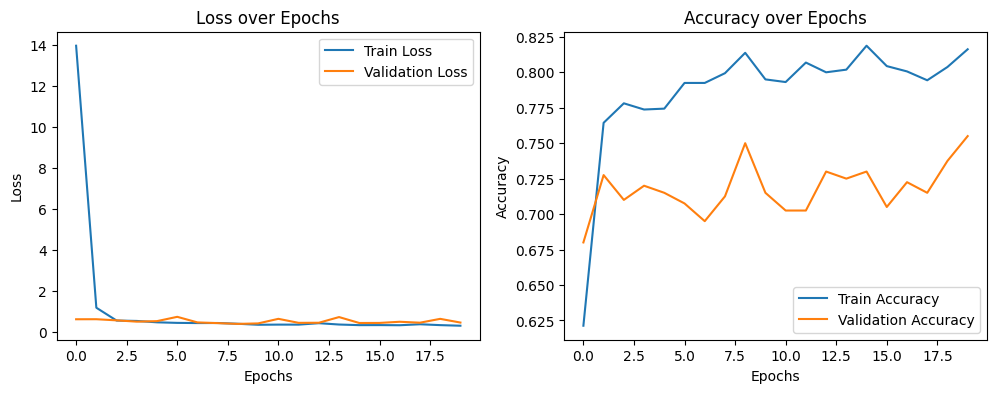

In [11]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()